# The code here is to combine weather data and trip data

In [1]:
from datetime import datetime, date, time
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from ggplot import *

In [2]:
# lambdas & functions
lambda_city = lambda x: station_data['city'].ix[x]

def convert_float(val):
    try:
        return float(val)
    except ValueError:
        return 0

# dictionary reference
seasons_dict = {
    1: 'Winter',2: 'Spring',3: 'Spring',4: 'Spring',
    5: 'Summer',6: 'Summer',7: 'Summer',8: 'Autumn',
    9: 'Autumn',10: 'Autumn',11: 'Winter',12: 'Winter'}

city_dict = {
    94107: 'San Francisco',
    94063: 'Redwood City',
    94301: 'Palo Alto', 
    94041: 'Mountain View', 
    95113: 'San Jose'}

# header reference
station_headers = ['station_id','station_name','lat','long',
                   'dock_count','city','install_date']

status_headers = ['station_id','bikes_free','docks_free','time']

trip_headers = ['trip_id','trip_time',
                'start_dt','start_station','start_id',
                'end_dt','end_station','end_id',
                'bike_num','user_type','ZIP']

weather_headers = ['date',
                   'max_temp','mean_temp','min_temp',
                   'max_dp','mean_dp','min_dp',
                   'max_hum','mean_hum','min_hum',
                   'max_sea','mean_sea','min_sea',
                   'max_vis','mean_vis','min_vis',
                   'max_wind','mean_wind','max_gust',
                   'rain_inches','cloud_cover','events',
                   'wind_dir_degrees','ZIP']

## Weather data

In [3]:
# read weather data
weather_data = pd.read_csv('weather_data_new.csv', parse_dates=['date'])
weather_data['season'] = weather_data['date'].dt.month.map(seasons_dict)
weather_data['city'] = weather_data['ZIP'].map(city_dict)
# scrubbed columns from weather_data
weather_data['rain_inches'] = weather_data['rain_inches'].map(convert_float)

In [4]:
import datetime

In [5]:
# split weather data to 2014 and 2015
weather_2015 = weather_data[weather_data['date'] >='2014-09-01']
weather_2014 = weather_data[weather_data['date'] <'2014-09-01']

# label the datasets by month
weather_2014['month'] = weather_2014['date'].dt.month
weather_2015['month'] = weather_2015['date'].dt.month


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# create a new dataframe that contains only the info that I need (month, season, avg_tem)
weather_2014_for_me = weather_2014[['date', 'mean_temp','mean_wind','season', 'city','month']]
weather_2015_for_me = weather_2015[['date', 'mean_temp','mean_wind','season', 'city','month']]

In [261]:
# functions used to create frames for each month
def trip_count_to_frame(data, column, elem):
    temp = data[data[column] == elem].groupby('user_type')['date'].count()
    temp = temp.to_frame(name=elem).T
    return temp

def add_avg_temp_to_data(data, data_add,column_name, sort_range):
    for i in sort_range:
        avg_temp = data[data[column_name] == i]['mean_temp'].mean()
        data_add['mean_temp'].loc[i] = avg_temp        
    return data_add
# define sort_range
sort_range_month = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]  # sort_range for month

## Trip data

In [9]:
# read trip data and split it for 2014 and 2015
trip_data = pd.read_csv('trip_data_new.csv', parse_dates = ['date'])
trip_data_2014 = trip_data[trip_data['date'] < '2014-09-01']
trip_data_2015 = trip_data[trip_data['date'] >= '2014-09-01']

In [10]:
# label the trip datasets by month
trip_data_2014['month'] = trip_data_2014['date'].dt.month
trip_data_2015['month'] = trip_data_2015['date'].dt.month
trip_data_2014['trip_time'] = trip_data_2014['trip_time'] / 60   # concert trip time unit to minute
trip_data_2015['trip_time'] = trip_data_2015['trip_time'] / 60  

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [11]:
# create a new dataframe that contains only the info that I need (month, season, trip time, user type, city)
trip_data_2014_for_me = trip_data_2014[['date', 'trip_time','user_type','start_city', 'month']]
trip_data_2015_for_me = trip_data_2015[['date', 'trip_time','user_type','start_city','month']]

## Weather and trip data together per city

### San Francisco 2014

In [13]:
# sf weather and trip data
SF_weather_2014 = weather_2014_for_me[weather_2014_for_me['city']=='San Francisco']
SF_trip_data_2014 = trip_data_2014_for_me[trip_data_2014_for_me['start_city'] =='San Francisco']

SF_all_2014 = pd.merge(SF_trip_data_2014, SF_weather_2014,on='date')
SF_all_2014 = SF_all_2014.drop(['start_city', 'month_x'], axis=1)
SF_all_2014 = SF_all_2014.rename(columns={'month_y': 'month'})

In [14]:
# sf by user statistics
SF_all_2014.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2013-09-01,25.133333,Customer,66,13,Autumn,San Francisco,9
1,2013-09-01,4.566667,Subscriber,66,13,Autumn,San Francisco,9
2,2013-09-01,19.950000,Customer,66,13,Autumn,San Francisco,9
3,2013-09-01,25.183333,Customer,66,13,Autumn,San Francisco,9
4,2013-09-01,25.183333,Customer,66,13,Autumn,San Francisco,9


In [263]:
# SF DATA PER MONTH
SF_0913_result = trip_count_to_frame(SF_all_2014, 'month', 9)
SF_1013_result = trip_count_to_frame(SF_all_2014, 'month', 10)
SF_1113_result = trip_count_to_frame(SF_all_2014, 'month', 11)
SF_1213_result = trip_count_to_frame(SF_all_2014, 'month', 12)
SF_0114_result = trip_count_to_frame(SF_all_2014, 'month', 1)
SF_0214_result = trip_count_to_frame(SF_all_2014, 'month', 2)
SF_0314_result = trip_count_to_frame(SF_all_2014, 'month', 3)
SF_0414_result = trip_count_to_frame(SF_all_2014, 'month', 4)
SF_0514_result = trip_count_to_frame(SF_all_2014, 'month', 5)
SF_0614_result = trip_count_to_frame(SF_all_2014, 'month', 6)
SF_0714_result = trip_count_to_frame(SF_all_2014, 'month', 7)
SF_0814_result = trip_count_to_frame(SF_all_2014, 'month', 8)
# concat all the above dataframes
SF_trip_count_month_2014_all = pd.concat([SF_0913_result,SF_1013_result,SF_1113_result,SF_1213_result,SF_0114_result,
                  SF_0214_result,SF_0314_result,SF_0514_result,SF_0614_result,SF_0714_result,
                  SF_0814_result])
SF_trip_count_month_2014_all['mean_temp'] = 'NaN'

In [264]:
# add avg temp to table
SF_trip_count_month_2014_all = add_avg_temp_to_data(SF_all_2014, SF_trip_count_month_2014_all, 'month', sort_range_month)
SF_trip_count_month_2014_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,8590,14114,65.6521
10,5493,20659,61.3209
11,3965,18008,58.1541
12,2909,15228,49.4969
1,2955,19044,55.7595


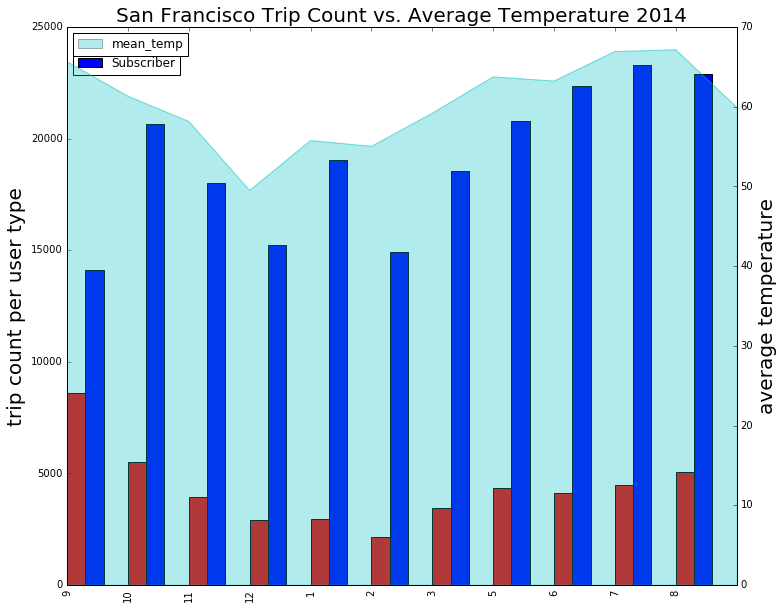

In [258]:
# plot SF 2014 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
SF_trip_count_month_2014_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
SF_trip_count_month_2014_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
SF_trip_count_month_2014_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('San Francisco Trip Count vs. Average Temperature 2014', fontsize=20)

### San Francisco 2015

In [259]:
# sf weather and trip data
SF_weather_2015 = weather_2015_for_me[weather_2015_for_me['city']=='San Francisco']
SF_trip_data_2015 = trip_data_2015_for_me[trip_data_2015_for_me['start_city'] =='San Francisco']

SF_all_2015 = pd.merge(SF_trip_data_2015, SF_weather_2015,on='date')
SF_all_2015 = SF_all_2015.drop(['start_city', 'month_x'], axis=1)
SF_all_2015 = SF_all_2015.rename(columns={'month_y': 'month'})

In [260]:
# sf by user statistics
SF_all_2015.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2014-09-01,30.300000,Customer,70,7,Autumn,San Francisco,9
1,2014-09-01,30.650000,Customer,70,7,Autumn,San Francisco,9
2,2014-09-01,13.116667,Subscriber,70,7,Autumn,San Francisco,9
3,2014-09-01,9.450000,Subscriber,70,7,Autumn,San Francisco,9
4,2014-09-01,29.466667,Customer,70,7,Autumn,San Francisco,9


In [265]:
# SF DATA PER MONTH
SF_0914_result = trip_count_to_frame(SF_all_2015, 'month', 9)
SF_1014_result = trip_count_to_frame(SF_all_2015, 'month', 10)
SF_1114_result = trip_count_to_frame(SF_all_2015, 'month', 11)
SF_1214_result = trip_count_to_frame(SF_all_2015, 'month', 12)
SF_0115_result = trip_count_to_frame(SF_all_2015, 'month', 1)
SF_0215_result = trip_count_to_frame(SF_all_2015, 'month', 2)
SF_0315_result = trip_count_to_frame(SF_all_2015, 'month', 3)
SF_0415_result = trip_count_to_frame(SF_all_2015, 'month', 4)
SF_0515_result = trip_count_to_frame(SF_all_2015, 'month', 5)
SF_0615_result = trip_count_to_frame(SF_all_2015, 'month', 6)
SF_0715_result = trip_count_to_frame(SF_all_2015, 'month', 7)
SF_0815_result = trip_count_to_frame(SF_all_2015, 'month', 8)
# concat all the above dataframes
SF_trip_count_month_2015_all = pd.concat([SF_0914_result,SF_1014_result,SF_1114_result,SF_1214_result,SF_0115_result,
                  SF_0215_result,SF_0315_result,SF_0515_result,SF_0615_result,SF_0715_result,
                  SF_0815_result])
SF_trip_count_month_2015_all['mean_temp'] = 'NaN'

In [266]:
# add avg temp to table
SF_trip_count_month_2015_all = add_avg_temp_to_data(SF_all_2015, SF_trip_count_month_2015_all, 'month', sort_range_month)
SF_trip_count_month_2015_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,3756,24779,67.3277
10,3965,27125,63.7202
11,2503,20614,57.3324
12,2154,16024,56.4926
1,2440,22972,51.6027


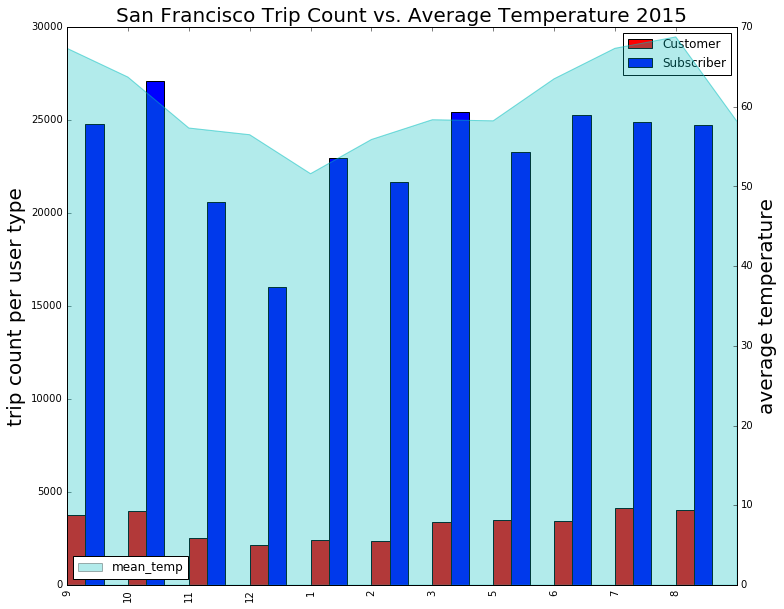

In [267]:
# plot SF 2015 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
SF_trip_count_month_2015_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
SF_trip_count_month_2015_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
SF_trip_count_month_2015_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('San Francisco Trip Count vs. Average Temperature 2015', fontsize=20)

### San Jose 2014

In [268]:
# sf weather and trip data
SJ_weather_2014 = weather_2014_for_me[weather_2014_for_me['city']=='San Jose']
SJ_trip_data_2014 = trip_data_2014_for_me[trip_data_2014_for_me['start_city'] =='San Jose']

SJ_all_2014 = pd.merge(SJ_trip_data_2014, SJ_weather_2014,on='date')
SJ_all_2014 = SJ_all_2014.drop(['start_city', 'month_x'], axis=1)
SJ_all_2014 = SJ_all_2014.rename(columns={'month_y': 'month'})

In [269]:
# sj by user statistics
SJ_all_2014.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2013-09-01,11.483333,Customer,72,7,Autumn,San Jose,9
1,2013-09-01,10.783333,Customer,72,7,Autumn,San Jose,9
2,2013-09-01,71.583333,Customer,72,7,Autumn,San Jose,9
3,2013-09-01,70.866667,Customer,72,7,Autumn,San Jose,9
4,2013-09-01,23.466667,Customer,72,7,Autumn,San Jose,9


In [271]:
# SJ DATA PER MONTH
SJ_0913_result = trip_count_to_frame(SJ_all_2014, 'month', 9)
SJ_1013_result = trip_count_to_frame(SJ_all_2014, 'month', 10)
SJ_1113_result = trip_count_to_frame(SJ_all_2014, 'month', 11)
SJ_1213_result = trip_count_to_frame(SJ_all_2014, 'month', 12)
SJ_0114_result = trip_count_to_frame(SJ_all_2014, 'month', 1)
SJ_0214_result = trip_count_to_frame(SJ_all_2014, 'month', 2)
SJ_0314_result = trip_count_to_frame(SJ_all_2014, 'month', 3)
SJ_0414_result = trip_count_to_frame(SJ_all_2014, 'month', 4)
SJ_0514_result = trip_count_to_frame(SJ_all_2014, 'month', 5)
SJ_0614_result = trip_count_to_frame(SJ_all_2014, 'month', 6)
SJ_0714_result = trip_count_to_frame(SJ_all_2014, 'month', 7)
SJ_0814_result = trip_count_to_frame(SJ_all_2014, 'month', 8)
# concat all the above dataframes
SJ_trip_count_month_2014_all = pd.concat([SJ_0913_result,SJ_1013_result,SJ_1113_result,SJ_1213_result,SJ_0114_result,
                  SJ_0214_result,SJ_0314_result,SJ_0514_result,SJ_0614_result,SJ_0714_result,
                  SJ_0814_result])
SJ_trip_count_month_2014_all['mean_temp'] = 'NaN'

In [272]:
# add avg temp to table
SJ_trip_count_month_2014_all = add_avg_temp_to_data(SJ_all_2014, SJ_trip_count_month_2014_all, 'month', sort_range_month)
SJ_trip_count_month_2014_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,526,1157,68.2692
10,357,1605,61.579
11,238,1109,56.8092
12,160,930,47.2248
1,253,1292,54.2647


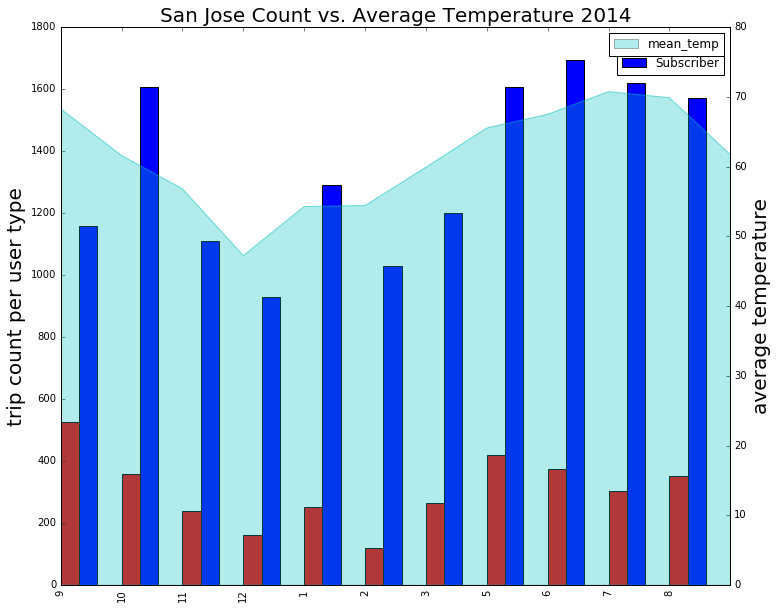

In [273]:
# plot SJ 2014 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
SJ_trip_count_month_2014_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
SJ_trip_count_month_2014_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
SJ_trip_count_month_2014_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('San Jose Count vs. Average Temperature 2014', fontsize=20)

### San Jose 2015

In [274]:
SJ_weather_2015 = weather_2015_for_me[weather_2015_for_me['city']=='San Jose']
SJ_trip_data_2015 = trip_data_2015_for_me[trip_data_2015_for_me['start_city'] =='San Jose']

SJ_all_2015 = pd.merge(SJ_trip_data_2015, SJ_weather_2015,on='date')
SJ_all_2015 = SJ_all_2015.drop(['start_city', 'month_x'], axis=1)
SJ_all_2015 = SJ_all_2015.rename(columns={'month_y': 'month'})

In [275]:
# SJ by user statistics
SJ_all_2015.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2014-09-01,32.033333,Customer,72,5,Autumn,San Jose,9
1,2014-09-01,35.216667,Customer,72,5,Autumn,San Jose,9
2,2014-09-01,8.383333,Subscriber,72,5,Autumn,San Jose,9
3,2014-09-01,10.516667,Customer,72,5,Autumn,San Jose,9
4,2014-09-01,12.933333,Customer,72,5,Autumn,San Jose,9


In [276]:
# SF DATA PER MONTH
SJ_0914_result = trip_count_to_frame(SJ_all_2015, 'month', 9)
SJ_1014_result = trip_count_to_frame(SJ_all_2015, 'month', 10)
SJ_1114_result = trip_count_to_frame(SJ_all_2015, 'month', 11)
SJ_1214_result = trip_count_to_frame(SJ_all_2015, 'month', 12)
SJ_0115_result = trip_count_to_frame(SJ_all_2015, 'month', 1)
SJ_0215_result = trip_count_to_frame(SJ_all_2015, 'month', 2)
SJ_0315_result = trip_count_to_frame(SJ_all_2015, 'month', 3)
SJ_0415_result = trip_count_to_frame(SJ_all_2015, 'month', 4)
SJ_0515_result = trip_count_to_frame(SJ_all_2015, 'month', 5)
SJ_0615_result = trip_count_to_frame(SJ_all_2015, 'month', 6)
SJ_0715_result = trip_count_to_frame(SJ_all_2015, 'month', 7)
SJ_0815_result = trip_count_to_frame(SJ_all_2015, 'month', 8)
# concat all the above dataframes
SJ_trip_count_month_2015_all = pd.concat([SJ_0914_result,SJ_1014_result,SJ_1114_result,SJ_1214_result,SJ_0115_result,
                  SJ_0215_result,SJ_0315_result,SJ_0515_result,SJ_0615_result,SJ_0715_result,
                  SJ_0815_result])
SJ_trip_count_month_2015_all['mean_temp'] = 'NaN'

In [277]:
# add avg temp to table
SJ_trip_count_month_2015_all = add_avg_temp_to_data(SJ_all_2015, SJ_trip_count_month_2015_all, 'month', sort_range_month)
SJ_trip_count_month_2015_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,228,1599,68.6732
10,211,1570,65.7193
11,179,1237,57.69
12,57,803,56.2791
1,110,1210,52.5083


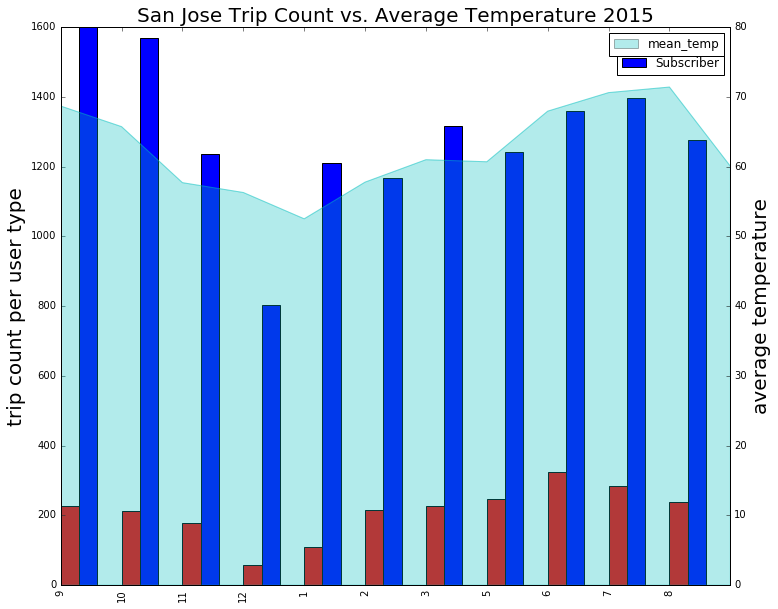

In [278]:
# plot SF 2015 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
SJ_trip_count_month_2015_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
SJ_trip_count_month_2015_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
SJ_trip_count_month_2015_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('San Jose Trip Count vs. Average Temperature 2015', fontsize=20)

### Palo Alto 2014

In [280]:
# pa weather and trip data
PA_weather_2014 = weather_2014_for_me[weather_2014_for_me['city']=='Palo Alto']
PA_trip_data_2014 = trip_data_2014_for_me[trip_data_2014_for_me['start_city'] =='Palo Alto']

PA_all_2014 = pd.merge(PA_trip_data_2014, PA_weather_2014,on='date')
PA_all_2014 = PA_all_2014.drop(['start_city', 'month_x'], axis=1)
PA_all_2014 = PA_all_2014.rename(columns={'month_y': 'month'})

In [281]:
# pa by user statistics
PA_all_2014.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2013-09-01,99.100000,Customer,71,7,Autumn,Palo Alto,9
1,2013-09-01,106.066667,Customer,71,7,Autumn,Palo Alto,9
2,2013-09-01,85.816667,Customer,71,7,Autumn,Palo Alto,9
3,2013-09-01,84.266667,Customer,71,7,Autumn,Palo Alto,9
4,2013-09-01,88.016667,Customer,71,7,Autumn,Palo Alto,9


In [282]:
# PA DATA PER MONTH
PA_0913_result = trip_count_to_frame(PA_all_2014, 'month', 9)
PA_1013_result = trip_count_to_frame(PA_all_2014, 'month', 10)
PA_1113_result = trip_count_to_frame(PA_all_2014, 'month', 11)
PA_1213_result = trip_count_to_frame(PA_all_2014, 'month', 12)
PA_0114_result = trip_count_to_frame(PA_all_2014, 'month', 1)
PA_0214_result = trip_count_to_frame(PA_all_2014, 'month', 2)
PA_0314_result = trip_count_to_frame(PA_all_2014, 'month', 3)
PA_0414_result = trip_count_to_frame(PA_all_2014, 'month', 4)
PA_0514_result = trip_count_to_frame(PA_all_2014, 'month', 5)
PA_0614_result = trip_count_to_frame(PA_all_2014, 'month', 6)
PA_0714_result = trip_count_to_frame(PA_all_2014, 'month', 7)
PA_0814_result = trip_count_to_frame(PA_all_2014, 'month', 8)
# concat all the above dataframes
PA_trip_count_month_2014_all = pd.concat([PA_0913_result,PA_1013_result,PA_1113_result,PA_1213_result,PA_0114_result,
                  PA_0214_result,PA_0314_result,PA_0514_result,PA_0614_result,PA_0714_result,
                  PA_0814_result])
PA_trip_count_month_2014_all['mean_temp'] = 'NaN'

In [283]:
# add avg temp to table
PA_trip_count_month_2014_all = add_avg_temp_to_data(PA_all_2014, PA_trip_count_month_2014_all, 'month', sort_range_month)
PA_trip_count_month_2014_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,211,111,68.5497
10,169,208,62.1936
11,145,148,57.0648
12,81,131,48.6698
1,99,165,54.7273


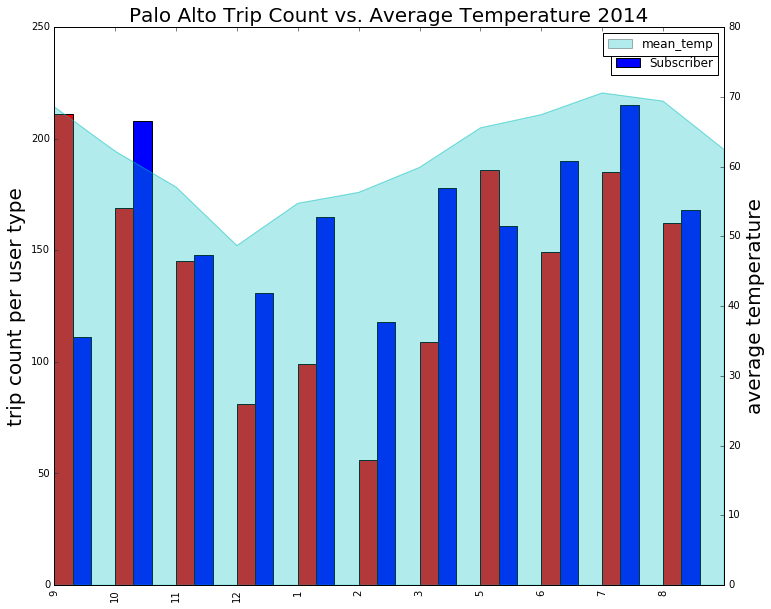

In [284]:
# plot SF 2014 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
PA_trip_count_month_2014_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
PA_trip_count_month_2014_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
PA_trip_count_month_2014_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('Palo Alto Trip Count vs. Average Temperature 2014', fontsize=20)

### Palo Alto 2015

In [285]:
# sf weather and trip data
PA_weather_2015 = weather_2015_for_me[weather_2015_for_me['city']=='Palo Alto']
PA_trip_data_2015 = trip_data_2015_for_me[trip_data_2015_for_me['start_city'] =='Palo Alto']

PA_all_2015 = pd.merge(PA_trip_data_2015, PA_weather_2015,on='date')
PA_all_2015 = PA_all_2015.drop(['start_city', 'month_x'], axis=1)
PA_all_2015 = PA_all_2015.rename(columns={'month_y': 'month'})

In [286]:
# sf by user statistics
PA_all_2015.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2014-09-01,227.250000,Customer,72,6,Autumn,Palo Alto,9
1,2014-09-02,10.550000,Subscriber,66,10,Autumn,Palo Alto,9
2,2014-09-02,59.433333,Customer,66,10,Autumn,Palo Alto,9
3,2014-09-02,4.550000,Customer,66,10,Autumn,Palo Alto,9
4,2014-09-02,12.233333,Customer,66,10,Autumn,Palo Alto,9


In [287]:
# SF DATA PER MONTH
PA_0914_result = trip_count_to_frame(PA_all_2015, 'month', 9)
PA_1014_result = trip_count_to_frame(PA_all_2015, 'month', 10)
PA_1114_result = trip_count_to_frame(PA_all_2015, 'month', 11)
PA_1214_result = trip_count_to_frame(PA_all_2015, 'month', 12)
PA_0115_result = trip_count_to_frame(PA_all_2015, 'month', 1)
PA_0215_result = trip_count_to_frame(PA_all_2015, 'month', 2)
PA_0315_result = trip_count_to_frame(PA_all_2015, 'month', 3)
PA_0415_result = trip_count_to_frame(PA_all_2015, 'month', 4)
PA_0515_result = trip_count_to_frame(PA_all_2015, 'month', 5)
PA_0615_result = trip_count_to_frame(PA_all_2015, 'month', 6)
PA_0715_result = trip_count_to_frame(PA_all_2015, 'month', 7)
PA_0815_result = trip_count_to_frame(PA_all_2015, 'month', 8)
# concat all the above dataframes
PA_trip_count_month_2015_all = pd.concat([PA_0914_result,PA_1014_result,PA_1114_result,PA_1214_result,PA_0115_result,
                  PA_0215_result,PA_0315_result,PA_0515_result,PA_0615_result,PA_0715_result,
                  PA_0815_result])
PA_trip_count_month_2015_all['mean_temp'] = 'NaN'

In [288]:
# add avg temp to table
PA_trip_count_month_2015_all = add_avg_temp_to_data(PA_all_2015, PA_trip_count_month_2015_all, 'month', sort_range_month)
PA_trip_count_month_2015_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,125,170,68.5661
10,116,174,66.0621
11,95,123,58.0872
12,31,79,56.9091
1,86,140,52.4381


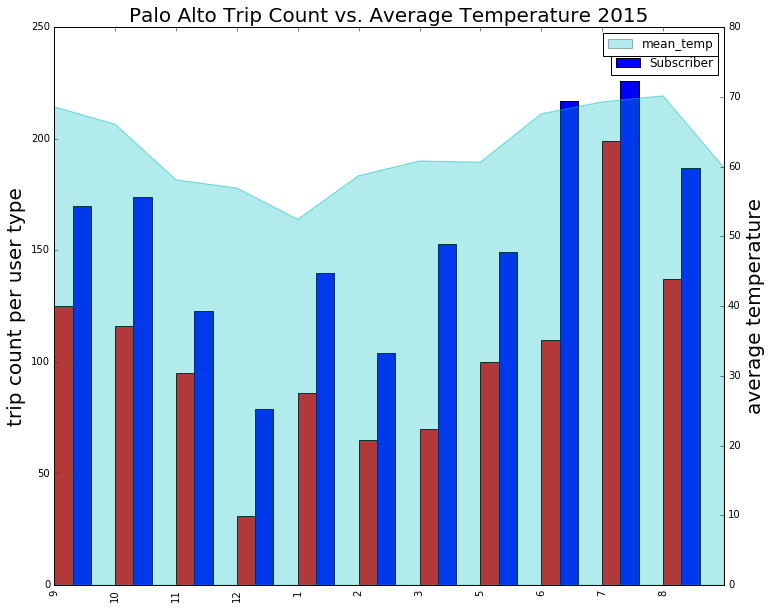

In [289]:
# plot SF 2015 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
PA_trip_count_month_2015_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
PA_trip_count_month_2015_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
PA_trip_count_month_2015_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('Palo Alto Trip Count vs. Average Temperature 2015', fontsize=20)

### Redwood City 2014

In [290]:
# rc weather and trip data
RC_weather_2014 = weather_2014_for_me[weather_2014_for_me['city']=='Redwood City']
RC_trip_data_2014 = trip_data_2014_for_me[trip_data_2014_for_me['start_city'] =='Redwood City']

RC_all_2014 = pd.merge(RC_trip_data_2014, RC_weather_2014,on='date')
RC_all_2014 = RC_all_2014.drop(['start_city', 'month_x'], axis=1)
RC_all_2014 = RC_all_2014.rename(columns={'month_y': 'month'})

In [291]:
# RC by user statistics
RC_all_2014.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2013-09-01,4.116667,Subscriber,71,5,Autumn,Redwood City,9
1,2013-09-01,27.616667,Customer,71,5,Autumn,Redwood City,9
2,2013-09-01,5.316667,Subscriber,71,5,Autumn,Redwood City,9
3,2013-09-01,2.650000,Subscriber,71,5,Autumn,Redwood City,9
4,2013-09-01,435.000000,Customer,71,5,Autumn,Redwood City,9


In [292]:
# RC DATA PER MONTH
RC_0913_result = trip_count_to_frame(RC_all_2014, 'month', 9)
RC_1013_result = trip_count_to_frame(RC_all_2014, 'month', 10)
RC_1113_result = trip_count_to_frame(RC_all_2014, 'month', 11)
RC_1213_result = trip_count_to_frame(RC_all_2014, 'month', 12)
RC_0114_result = trip_count_to_frame(RC_all_2014, 'month', 1)
RC_0214_result = trip_count_to_frame(RC_all_2014, 'month', 2)
RC_0314_result = trip_count_to_frame(RC_all_2014, 'month', 3)
RC_0414_result = trip_count_to_frame(RC_all_2014, 'month', 4)
RC_0514_result = trip_count_to_frame(RC_all_2014, 'month', 5)
RC_0614_result = trip_count_to_frame(RC_all_2014, 'month', 6)
RC_0714_result = trip_count_to_frame(RC_all_2014, 'month', 7)
RC_0814_result = trip_count_to_frame(RC_all_2014, 'month', 8)
# concat all the above dataframes
RC_trip_count_month_2014_all = pd.concat([RC_0913_result,RC_1013_result,RC_1113_result,RC_1213_result,RC_0114_result,
                  RC_0214_result,RC_0314_result,RC_0514_result,RC_0614_result,RC_0714_result,
                  RC_0814_result])
RC_trip_count_month_2014_all['mean_temp'] = 'NaN'

In [293]:
# add avg temp to table
RC_trip_count_month_2014_all = add_avg_temp_to_data(RC_all_2014, RC_trip_count_month_2014_all, 'month', sort_range_month)
RC_trip_count_month_2014_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,33,157,67.3474
10,25,167,60.8646
11,49,130,56.7374
12,10,49,47.7797
1,13,66,52.8354


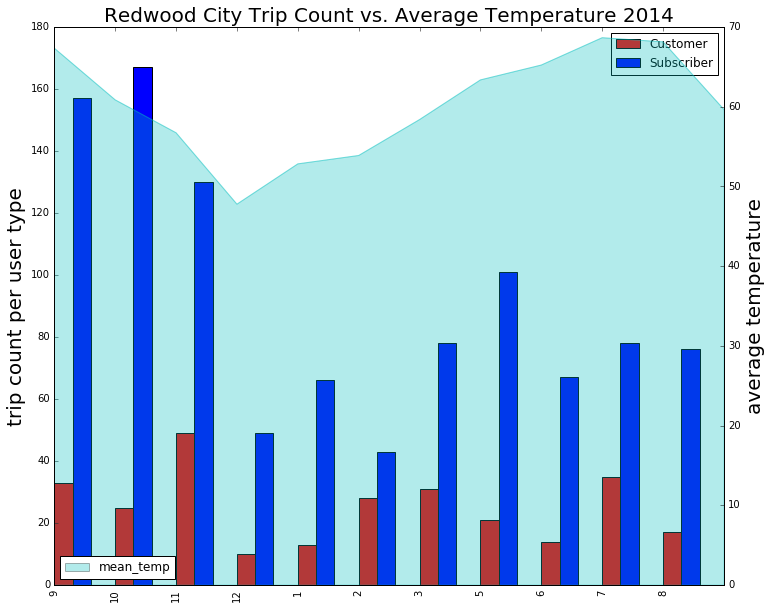

In [294]:
# plot RC 2014 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
RC_trip_count_month_2014_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
RC_trip_count_month_2014_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
RC_trip_count_month_2014_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('Redwood City Trip Count vs. Average Temperature 2014', fontsize=20)

### Redwood City 2015

In [295]:
# sf weather and trip data
RC_weather_2015 = weather_2015_for_me[weather_2015_for_me['city']=='Redwood City']
RC_trip_data_2015 = trip_data_2015_for_me[trip_data_2015_for_me['start_city'] =='Redwood City']

RC_all_2015 = pd.merge(RC_trip_data_2015, RC_weather_2015,on='date')
RC_all_2015 = RC_all_2015.drop(['start_city', 'month_x'], axis=1)
RC_all_2015 = RC_all_2015.rename(columns={'month_y': 'month'})

In [296]:
# RC by user statistics
RC_all_2015.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2014-09-02,5.216667,Subscriber,68,3,Autumn,Redwood City,9
1,2014-09-02,5.100000,Subscriber,68,3,Autumn,Redwood City,9
2,2014-09-03,4.650000,Subscriber,70,4,Autumn,Redwood City,9
3,2014-09-03,5.066667,Subscriber,70,4,Autumn,Redwood City,9
4,2014-09-03,7.766667,Subscriber,70,4,Autumn,Redwood City,9


In [297]:
# RC DATA PER MONTH
RC_0914_result = trip_count_to_frame(RC_all_2015, 'month', 9)
RC_1014_result = trip_count_to_frame(RC_all_2015, 'month', 10)
RC_1114_result = trip_count_to_frame(RC_all_2015, 'month', 11)
RC_1214_result = trip_count_to_frame(RC_all_2015, 'month', 12)
RC_0115_result = trip_count_to_frame(RC_all_2015, 'month', 1)
RC_0215_result = trip_count_to_frame(RC_all_2015, 'month', 2)
RC_0315_result = trip_count_to_frame(RC_all_2015, 'month', 3)
RC_0415_result = trip_count_to_frame(RC_all_2015, 'month', 4)
RC_0515_result = trip_count_to_frame(RC_all_2015, 'month', 5)
RC_0615_result = trip_count_to_frame(RC_all_2015, 'month', 6)
RC_0715_result = trip_count_to_frame(RC_all_2015, 'month', 7)
RC_0815_result = trip_count_to_frame(RC_all_2015, 'month', 8)
# concat all the above dataframes
RC_trip_count_month_2015_all = pd.concat([RC_0914_result,RC_1014_result,RC_1114_result,RC_1214_result,RC_0115_result,
                  RC_0215_result,RC_0315_result,RC_0515_result,RC_0615_result,RC_0715_result,
                  RC_0815_result])
RC_trip_count_month_2015_all['mean_temp'] = 'NaN'

In [298]:
# add avg temp to table
RC_trip_count_month_2015_all = add_avg_temp_to_data(RC_all_2015, RC_trip_count_month_2015_all, 'month', sort_range_month)
RC_trip_count_month_2015_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,23,93,68.1034
10,18,98,66.4397
11,27,66,58.1828
12,11,48,55.5593
1,33,127,53.0812


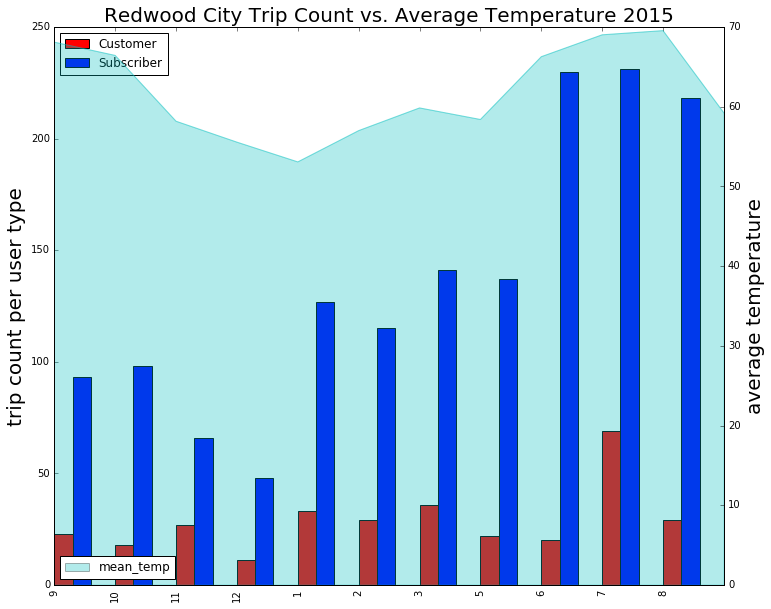

In [299]:
# plot RC 2015 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
RC_trip_count_month_2015_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
RC_trip_count_month_2015_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
RC_trip_count_month_2015_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('Redwood City Trip Count vs. Average Temperature 2015', fontsize=20)

### Mountain View 2014

In [300]:
# mv weather and trip data
MV_weather_2014 = weather_2014_for_me[weather_2014_for_me['city']=='Mountain View']
MV_trip_data_2014 = trip_data_2014_for_me[trip_data_2014_for_me['start_city'] =='Mountain View']

MV_all_2014 = pd.merge(MV_trip_data_2014, MV_weather_2014,on='date')
MV_all_2014 = MV_all_2014.drop(['start_city', 'month_x'], axis=1)
MV_all_2014 = MV_all_2014.rename(columns={'month_y': 'month'})

In [301]:
# mv by user statistics
MV_all_2014.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2013-09-01,19.016667,Customer,70,4,Autumn,Mountain View,9
1,2013-09-01,20.600000,Customer,70,4,Autumn,Mountain View,9
2,2013-09-01,7.550000,Customer,70,4,Autumn,Mountain View,9
3,2013-09-01,70.400000,Customer,70,4,Autumn,Mountain View,9
4,2013-09-01,69.700000,Customer,70,4,Autumn,Mountain View,9


In [302]:
# mv DATA PER MONTH
MV_0913_result = trip_count_to_frame(MV_all_2014, 'month', 9)
MV_1013_result = trip_count_to_frame(MV_all_2014, 'month', 10)
MV_1113_result = trip_count_to_frame(MV_all_2014, 'month', 11)
MV_1213_result = trip_count_to_frame(MV_all_2014, 'month', 12)
MV_0114_result = trip_count_to_frame(MV_all_2014, 'month', 1)
MV_0214_result = trip_count_to_frame(MV_all_2014, 'month', 2)
MV_0314_result = trip_count_to_frame(MV_all_2014, 'month', 3)
MV_0414_result = trip_count_to_frame(MV_all_2014, 'month', 4)
MV_0514_result = trip_count_to_frame(MV_all_2014, 'month', 5)
MV_0614_result = trip_count_to_frame(MV_all_2014, 'month', 6)
MV_0714_result = trip_count_to_frame(MV_all_2014, 'month', 7)
MV_0814_result = trip_count_to_frame(MV_all_2014, 'month', 8)
# concat all the above dataframes
MV_trip_count_month_2014_all = pd.concat([MV_0913_result,MV_1013_result,MV_1113_result,MV_1213_result,MV_0114_result,
                  MV_0214_result,MV_0314_result,MV_0514_result,MV_0614_result,MV_0714_result,
                  MV_0814_result])
MV_trip_count_month_2014_all['mean_temp'] = 'NaN'

In [303]:
# add avg temp to table
MV_trip_count_month_2014_all = add_avg_temp_to_data(MV_all_2014, MV_trip_count_month_2014_all, 'month', sort_range_month)
MV_trip_count_month_2014_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,116,228,66.5116
10,82,340,59.2512
11,92,335,54.2787
12,75,321,45.1869
1,90,451,51.305


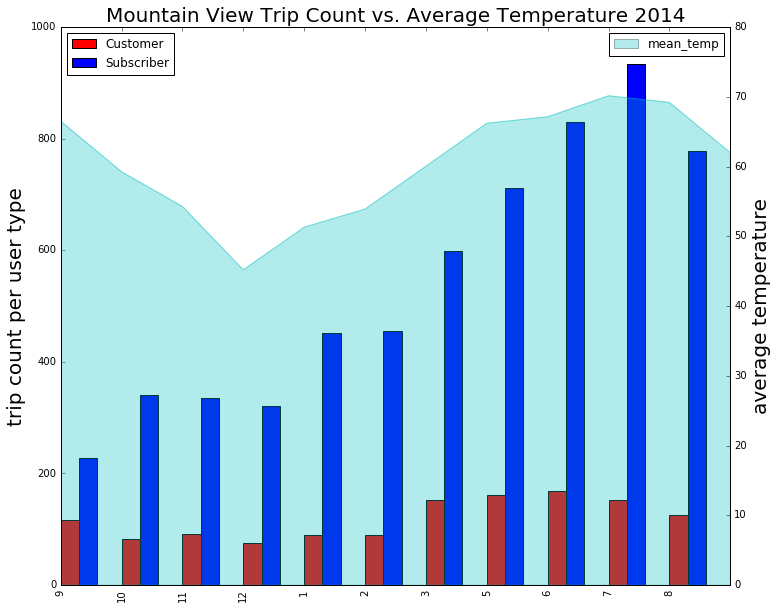

In [304]:
# plot MV 2014 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
MV_trip_count_month_2014_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
MV_trip_count_month_2014_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
MV_trip_count_month_2014_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('Mountain View Trip Count vs. Average Temperature 2014', fontsize=20)

### Mountain View 2015

In [305]:
# sf weather and trip data
MV_weather_2015 = weather_2015_for_me[weather_2015_for_me['city']=='Mountain View']
MV_trip_data_2015 = trip_data_2015_for_me[trip_data_2015_for_me['start_city'] =='Mountain View']

MV_all_2015 = pd.merge(MV_trip_data_2015, MV_weather_2015,on='date')
MV_all_2015 = MV_all_2015.drop(['start_city', 'month_x'], axis=1)
MV_all_2015 = MV_all_2015.rename(columns={'month_y': 'month'})

In [306]:
# mv by user statistics
MV_all_2015.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2014-09-01,159.016667,Customer,73,5,Autumn,Mountain View,9
1,2014-09-01,261.316667,Customer,73,5,Autumn,Mountain View,9
2,2014-09-01,13.116667,Subscriber,73,5,Autumn,Mountain View,9
3,2014-09-01,13.650000,Subscriber,73,5,Autumn,Mountain View,9
4,2014-09-01,7.150000,Subscriber,73,5,Autumn,Mountain View,9


In [307]:
# mv DATA PER MONTH
MV_0914_result = trip_count_to_frame(MV_all_2015, 'month', 9)
MV_1014_result = trip_count_to_frame(MV_all_2015, 'month', 10)
MV_1114_result = trip_count_to_frame(MV_all_2015, 'month', 11)
MV_1214_result = trip_count_to_frame(MV_all_2015, 'month', 12)
MV_0115_result = trip_count_to_frame(MV_all_2015, 'month', 1)
MV_0215_result = trip_count_to_frame(MV_all_2015, 'month', 2)
MV_0315_result = trip_count_to_frame(MV_all_2015, 'month', 3)
MV_0415_result = trip_count_to_frame(MV_all_2015, 'month', 4)
MV_0515_result = trip_count_to_frame(MV_all_2015, 'month', 5)
MV_0615_result = trip_count_to_frame(MV_all_2015, 'month', 6)
MV_0715_result = trip_count_to_frame(MV_all_2015, 'month', 7)
MV_0815_result = trip_count_to_frame(MV_all_2015, 'month', 8)
# concat all the above dataframes
MV_trip_count_month_2015_all = pd.concat([MV_0914_result,MV_1014_result,MV_1114_result,MV_1214_result,MV_0115_result,
                MV_0215_result,MV_0315_result,MV_0515_result,MV_0615_result,MV_0715_result,
                  MV_0815_result])
MV_trip_count_month_2015_all['mean_temp'] = 'NaN'

In [310]:
# add avg temp to table
MV_trip_count_month_2015_all = add_avg_temp_to_data(MV_all_2015, MV_trip_count_month_2015_all, 'month', sort_range_month)
MV_trip_count_month_2015_all.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


user_type,Customer,Subscriber,mean_temp
9,94,815,69.1859
10,77,866,66.0912
11,89,583,58.9182
12,38,432,57.6766
1,103,619,53.2313


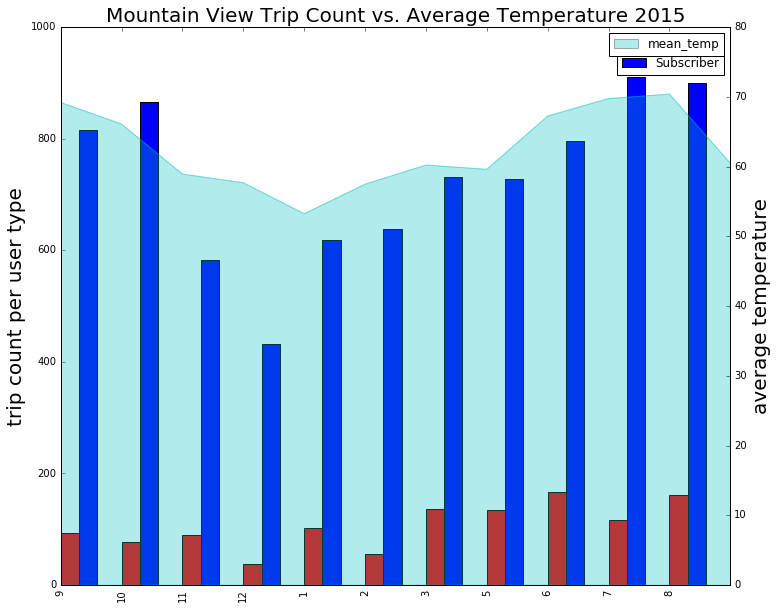

In [311]:
# plot mv 2015 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() 
MV_trip_count_month_2015_all.Customer.plot(kind='bar',color='red',ax=ax,width=0.3,legend=True, position=0,figsize=((12,10)))
MV_trip_count_month_2015_all.Subscriber.plot(kind='bar',color='blue', ax=ax,width=0.3, position = -1, legend=True)
MV_trip_count_month_2015_all.mean_temp.plot.area(ax=ax2,use_index=False, color='c',stacked=False,legend=True, alpha=0.3)
ax2.set_ylabel('average temperature',fontsize=20)
ax.set_ylabel('trip count per user type',fontsize=20)
plt.title('Mountain View Trip Count vs. Average Temperature 2015', fontsize=20)